In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '15788392-c9e3-44cc-8152-2264a30b948d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-02-14T13:31:11.872Z', 'error_code': 0, 'error_message': None, 'elapsed': 83, 'credit_count': 1, 'notice': None, 'total_count': 10883}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11941, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.reset_index(drop=True, inplace=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11941,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982415e+07,1.982415e+07,False,NaN,1,NaN,NaN,None,2025-02-14T13:30:00.000Z,96508.902735,2.997510e+10,-40.7654,-0.256251,0.664316,-1.190190,-1.574265,-7.219115,6.136981,1.913207e+12,59.6032,2.026687e+12,None,2025-02-14T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 21:33:45.737569
1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205478e+08,1.205478e+08,True,NaN,2,NaN,NaN,None,2025-02-14T13:29:00.000Z,2685.922349,1.566781e+10,-40.3898,-0.051822,0.987633,-2.101025,-16.548454,-31.269665,-15.554949,3.237819e+11,10.0909,3.237819e+11,None,2025-02-14T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 21:33:45.737569
2,52,XRP,XRP,xrp,1529,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-14T13:29:00.000Z,2.695319,8.135755e+09,51.3883,0.329670,10.529533,12.384021,-3.610583,13.143968,152.175377,1.558403e+11,4.8550,2.695319e+11,None,2025-02-14T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 21:33:45.737569
3,825,Tether USDt,USDT,tether,116766,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.418052e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-14T13:30:00.000Z,1.000115,7.573412e+10,-29.8647,0.008400,-0.018876,-0.043525,0.054178,0.074776,-0.009576,1.418215e+11,4.4200,1.435833e+11,None,2025-02-14T13:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-14 21:33:45.737569
4,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.882891e+08,5.940775e+08,True,NaN,5,NaN,NaN,None,2025-02-14T13:29:00.000Z,196.707108,2.908322e+09,-31.6228,-0.484379,2.866505,-0.443507,4.806954,-8.864937,-10.696484,9.604993e+10,2.9912,1.168593e+11,None,2025-02-14T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 21:33:45.737569
5,1839,BNB,BNB,bnb,2360,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424780e+08,1.424780e+08,False,NaN,6,NaN,NaN,None,2025-02-14T13:30:00.000Z,665.066424,4.463608e+09,8.2477,-0.019621,-8.380065,13.819558,-4.247575,-6.529040,6.183996,9.475736e+10,2.9509,9.475736e+10,None,2025-02-14T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 21:33:45.737569
6,3408,USDC,USDC,usd-coin,25687,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.618720e+10,5.618720e+10,False,NaN,7,NaN,NaN,None,2025-02-14T13:30:00.000Z,0.999948,7.150541e+09,-25.8080,-0.005462,-0.027960,-0.020238,-0.002736,0.015680,0.003668,5.618426e+10,1.7510,5.618426e+10,None,2025-02-14T13:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-14 21:33:45.737569
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.480425e+11,1.480425e+11,True,NaN,8,NaN,NaN,None,2025-02-14T13:30:00.000Z,0.267106,1.821714e+09,-10.8488,-0.654616,4.147427,5.201259,-25.477907,-32.603470,-28.828021,3.954300e+10,1.2324,3.954300e+10,None,2025-02-14T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 21:33:45.737569
8,2010,Cardano,ADA,cardano,1460,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.

In [15]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '15788392-c9e3-44cc-8152-2264a30b948d',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"C:\Users\ADMIN\Desktop\DATA ANALYSIS\PYTHON\automation\Coinmarketcap API\API.csv"):
        df.to_csv(r"C:\Users\ADMIN\Desktop\DATA ANALYSIS\PYTHON\automation\Coinmarketcap API\API.csv", header='column_names')
    else:
        df.to_csv(r"C:\Users\ADMIN\Desktop\DATA ANALYSIS\PYTHON\automation\Coinmarketcap API\API.csv", mode='a', header=False)

In [16]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2025-02-14T12:11:55.271Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 10879}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11941, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [19]:
df3 = pd.read_csv(r"C:\Users\ADMIN\Desktop\DATA ANALYSIS\PYTHON\automation\Coinmarketcap API\API.csv")
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11941,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.982413e+07,1.982413e+07,False,NaN,1,NaN,NaN,NaN,2025-02-14T12:10:00.000Z,96758.104156,3.059090e+10,-40.0203,-0.271834,0.837001,-1.083495,0.148364,-6.958265,6.407733,1.918145e+12,59.6404,2.031920e+12,NaN,2025-02-14T12:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:11:51.689541
1,1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205478e+08,1.205478e+08,True,NaN,2,NaN,NaN,NaN,2025-02-14T12:11:00.000Z,2687.800878,1.695268e+10,-37.2713,-0.512137,1.183268,-2.456609,-15.849821,-31.399864,-16.258011,3.240084e+11,10.0740,3.240084e+11,NaN,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:11:51.689541
2,2,52,XRP,XRP,xrp,1529,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,NaN,2025-02-14T12:11:00.000Z,2.707139,7.823285e+09,42.8688,-1.511962,10.105203,12.157244,-1.478989,14.718584,161.620057,1.565237e+11,4.8668,2.707139e+11,NaN,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:11:51.689541
3,3,825,Tether USDt,USDT,tether,116750,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.418052e+11,1.435668e+11,True,NaN,4,NaN,NaN,NaN,2025-02-14T12:11:00.000Z,1.000069,7.598806e+10,-29.7794,-0.007326,0.001502,-0.056379,0.053557,0.054946,0.000449,1.418149e+11,4.4093,1.435767e+11,NaN,2025-02-14T12:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-14 20:11:51.689541
4,4,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.882891e+08,5.940775e+08,True,NaN,5,NaN,NaN,NaN,2025-02-14T12:11:00.000Z,198.912443,2.902837e+09,-32.1902,-1.067499,3.800037,0.412802,6.649250,-7.260302,-9.277374,9.712678e+10,3.0204,1.181694e+11,NaN,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:11:51.689541
5,5,1839,BNB,BNB,bnb,2360,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424780e+08,1.424780e+08,False,NaN,6,NaN,NaN,NaN,2025-02-14T12:11:00.000Z,665.943662,4.736818e+09,24.0554,-0.343496,-6.027322,13.994816,-3.597205,-5.750011,5.773300,9.488235e+10,2.9503,9.488235e+10,NaN,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:11:51.689541
6,6,3408,USDC,USDC,usd-coin,25686,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.619081e+10,5.619081e+10,False,NaN,7,NaN,NaN,NaN,2025-02-14T12:11:00.000Z,0.999935,7.214611e+09,-25.3243,-0.005203,-0.005627,-0.044535,0.005064,0.001423,0.007261,5.618714e+10,1.7470,5.618714e+10,NaN,2025-02-14T12:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-14 20:11:51.689541
7,7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.480419e+11,1.480419e+11,True,NaN,8,NaN,NaN,NaN,2025-02-14T12:11:00.000Z,0.269910,1.779948e+09,-14.9361,-0.501635,4.921549,5.939777,-23.010219,-31.567711,-27.767791,3.995800e+10,1.2424,3.995800e+10,NaN,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:11:51.689541
8,8,2010,Cardano,ADA,cardano,1460,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'sm

In [20]:
pd.set_option('display.float.format', lambda x: '%.5f' % x)

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11941,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19824131.00000,19824131.00000,False,NaN,1,NaN,NaN,None,2025-02-14T12:11:00.000Z,96753.57058,30564487897.05680,-39.93160,-0.30470,0.85230,-1.00733,0.13925,-6.91452,6.40391,1918055457799.66724,59.63600,2031824982078.31006,None,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:12:52.293062
1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120547760.01376,120547760.01376,True,NaN,2,NaN,NaN,None,2025-02-14T12:11:00.000Z,2687.80088,16952676885.94731,-37.27130,-0.51214,1.18327,-2.45661,-15.84982,-31.39986,-16.25801,324008375188.76257,10.07400,324008375188.76001,None,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:12:52.293062
2,52,XRP,XRP,xrp,1529,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57818864895.00000,99986451428.00000,False,NaN,3,NaN,NaN,None,2025-02-14T12:11:00.000Z,2.70714,7823284545.34209,42.86880,-1.51196,10.10520,12.15724,-1.47899,14.71858,161.62006,156523680519.24194,4.86680,270713859228.28000,None,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:12:52.293062
3,825,Tether USDt,USDT,tether,116750,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141805189026.54910,143566824834.16351,True,NaN,4,NaN,NaN,None,2025-02-14T12:11:00.000Z,1.00007,75988055055.76515,-29.77940,-0.00733,0.00150,-0.05638,0.05356,0.05495,0.00045,141814922160.82291,4.40930,143576678882.47000,None,2025-02-14T12:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-14 20:12:52.293062
4,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,488289115.39320,594077503.76719,True,NaN,5,NaN,NaN,None,2025-02-14T12:11:00.000Z,198.91244,2902836582.80502,-32.19020,-1.06750,3.80004,0.41280,6.64925,-7.26030,-9.27737,97126780802.23256,3.02040,118169407568.03000,None,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:12:52.293062
5,1839,BNB,BNB,bnb,2360,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142478048.05000,142478048.05000,False,NaN,6,NaN,NaN,None,2025-02-14T12:11:00.000Z,665.94366,4736817943.51927,24.05540,-0.34350,-6.02732,13.99482,-3.59720,-5.75001,5.77330,94882353008.77104,2.95030,94882353008.77000,None,2025-02-14T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 20:12:52.293062
6,3408,USDC,USDC,usd-coin,25686,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56190810075.42564,56190810075.42564,False,NaN,7,NaN,NaN,None,2025-02-14T12:11:00.000Z,0.99993,7214610588.32708,-25.32430,-0.00520,-0.00563,-0.04453,0.00506,0.00142,0.00726,56187144492.35932,1.74700,56187144492.36000,None,2025-02-14T12:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-14 20:12:52.293062
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148041886383.70520,148041886383.70520,True,NaN,8,NaN,NaN,None,2025-02-14T12:11:00.000Z,0.26991,1779947739.80883,-14.93610,-0.50163,4.92155,5.93978,-23.01022,-31.56771,-27.76779,39957997500.96971,1.24240,39957997500.97000,None,2025-02-14T12:11:0

In [23]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.30470,0.85230,-1.00733,0.13925,-6.91452,6.40391
Ethereum,-0.51214,1.18327,-2.45661,-15.84982,-31.39986,-16.25801
XRP,-1.51196,10.10520,12.15724,-1.47899,14.71858,161.62006
Tether USDt,-0.00733,0.00150,-0.05638,0.05356,0.05495,0.00045
Solana,-1.06750,3.80004,0.41280,6.64925,-7.26030,-9.27737
BNB,-0.34350,-6.02732,13.99482,-3.59720,-5.75001,5.77330
USDC,-0.00520,-0.00563,-0.04453,0.00506,0.00142,0.00726
Dogecoin,-0.50163,4.92155,5.93978,-23.01022,-31.56771,-27.76779
Cardano,-1.08561,2.57985,9.73480,-19.71481,-24.20281,8.20499


In [24]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.30470
             quote.USD.percent_change_24h     0.85230
             quote.USD.percent_change_7d     -1.00733
             quote.USD.percent_change_30d     0.13925
             quote.USD.percent_change_60d    -6.91452
             quote.USD.percent_change_90d     6.40391
Ethereum     quote.USD.percent_change_1h     -0.51214
             quote.USD.percent_change_24h     1.18327
             quote.USD.percent_change_7d     -2.45661
             quote.USD.percent_change_30d   -15.84982
             quote.USD.percent_change_60d   -31.39986
             quote.USD.percent_change_90d   -16.25801
XRP          quote.USD.percent_change_1h     -1.51196
             quote.USD.percent_change_24h    10.10520
             quote.USD.percent_change_7d     12.15724
             quote.USD.percent_change_30d    -1.47899
             quote.USD.percent_change_60d    14.71858
             quote.USD.percent_change_90

In [27]:
type(df5)

pandas.core.series.Series

In [29]:
df6 = df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.30470
            quote.USD.percent_change_24h   0.85230
            quote.USD.percent_change_7d   -1.00733
            quote.USD.percent_change_30d   0.13925
            quote.USD.percent_change_60d  -6.91452
            quote.USD.percent_change_90d   6.40391
Ethereum    quote.USD.percent_change_1h   -0.51214
            quote.USD.percent_change_24h   1.18327
            quote.USD.percent_change_7d   -2.45661
            quote.USD.percent_change_30d -15.84982
            quote.USD.percent_change_60d -31.39986
            quote.USD.percent_change_90d -16.25801
XRP         quote.USD.percent_change_1h   -1.51196
            quote.USD.percent_change_24h  10.10520
            quote.USD.percent_change_7d   12.15724
            quote.USD.percent_change_30d  -1.47899
            quote.USD.percent_change_60d  14.71858
            quote.USD.percent_change_90d 161.62006
Tether USDt quote.USD.percent_change_1h   -0.00733
            quote.USD.percent_change_24h   0.00150
            quote.USD.percent_change_7d   -0.05638
            quote.USD.percent_change_30d   0.05356
            quote.USD.percent_change_60d   0.05495
            quote.USD.percent_change_90d   0.00045
Solana      quote.USD.percent_change_1h   -1.06750
            quote.USD.percent_change_24h   3.80004
            quote.USD.percent_change_7d    0.41280
            quote.USD.percent_change_30d   6.64925
            quote.USD.percent_change_60d  -7.26030
            quote.USD.percent_change_90d  -9.27737
BNB         quote.USD.percent_change_1h   -0.34350
            quote.USD.percent_change_24h  -6.02732
            quote.USD.percent_change_7d   13.99482
            quote.USD.percent_change_30d  -3.59720
            quote.USD.percent_change_60d  -5.75001
            quote.USD.percent_change_90d   5.77330
USDC        quote.USD.percent_change_1h   -0.00520
            quote.USD.percent_change_24h  -0.00563
            quote.USD.percent_change_7d   -0.04453
            quote.USD.percent_change_30d   0.00506
            quote.USD.percent_change_60d   0.00142
            quote.USD.percent_change_90d   0.00726
Dogecoin    quote.USD.percent_change_1h   -0.50163
            quote.USD.percent_change_24h   4.92155
            quote.USD.percent_change_7d    5.93978
            quote.USD.percent_change_30d -23.01022
            quote.USD.percent_change_60d -31.56771
            quote.USD.percent_change_90d -27.76779
Cardano     quote.USD.percent_change_1h   -1.08561
            quote.USD.percent_change_24h   2.57985
            quote.USD.percent_change_7d    9.73480
            quote.USD.percent_change_30d -19.71481
            quote.USD.percent_change_60d -24.20281
            quote.USD.percent_change_90d   8.20499
TRON        quote.USD.percent_change_1h   -0.05380
            quote.USD.percent_change_24h  -2.05179
            quote.USD.percent_change_7d    1.19995
            quote.USD.percent_change_30d   3.73483
            quote.USD.percent_change_60d -16.94634
            quote.USD.percent_change_90d  16.23029
Chainlink   quote.USD.percent_change_1h   -0.58240
            quote.USD.percent_change_24h   1.88999
            quote.USD.percent_change_7d   -1.38972
            quote.USD.percent_change_30d  -6.21411
            quote.USD.percent_change_60d -36.17500
            quote.USD.percent_change_90d  31.22884
Sui         quote.USD.percent_change_1h   -0.90751
            quote.USD.percent_change_24h   1.69242
            quote.USD.percent_change_7d   10.62639
            quote.USD.percent_change_30d -20.10499
            quote.USD.percent_change_60d -23.53788
            quote.USD.percent_change_90d  -4.97406
Stellar     quote.USD.percent_change_1h   -1.17306
            quote.USD.percent_change_24h   6.61248
            quote.USD.percent_change_7d    6.33166
            quote.USD.percent_change_30d -22.77857
            quote.USD.percent_change_60d -14.15280
            quo

In [38]:
df6.count()

values    90
dtype: int64

In [42]:
index = pd.Index(range(df6.shape[0]))

#df7 = df6.set_index(index)
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.30470
1,Bitcoin,quote.USD.percent_change_24h,0.85230
2,Bitcoin,quote.USD.percent_change_7d,-1.00733
3,Bitcoin,quote.USD.percent_change_30d,0.13925
4,Bitcoin,quote.USD.percent_change_60d,-6.91452
5,Bitcoin,quote.USD.percent_change_90d,6.40391
6,Ethereum,quote.USD.percent_change_1h,-0.51214
7,Ethereum,quote.USD.percent_change_24h,1.18327
8,Ethereum,quote.USD.percent_change_7d,-2.45661
9,Ethereum,quote.USD.percent_change_30d,-15.84982


In [44]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.30470
1,Bitcoin,quote.USD.percent_change_24h,0.85230
2,Bitcoin,quote.USD.percent_change_7d,-1.00733
3,Bitcoin,quote.USD.percent_change_30d,0.13925
4,Bitcoin,quote.USD.percent_change_60d,-6.91452
5,Bitcoin,quote.USD.percent_change_90d,6.40391
6,Ethereum,quote.USD.percent_change_1h,-0.51214
7,Ethereum,quote.USD.percent_change_24h,1.18327
8,Ethereum,quote.USD.percent_change_7d,-2.45661
9,Ethereum,quote.USD.percent_change_30d,-15.84982


In [58]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h'],['1hr'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h'],['24hr'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])
df8

,name,percent_change,values
0,Bitcoin,1hr,-0.30470
1,Bitcoin,24hr,0.85230
2,Bitcoin,7d,-1.00733
3,Bitcoin,30d,0.13925
4,Bitcoin,60d,-6.91452
5,Bitcoin,90d,6.40391
6,Ethereum,1hr,-0.51214
7,Ethereum,24hr,1.18327
8,Ethereum,7d,-2.45661
9,Ethereum,30d,-15.84982


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

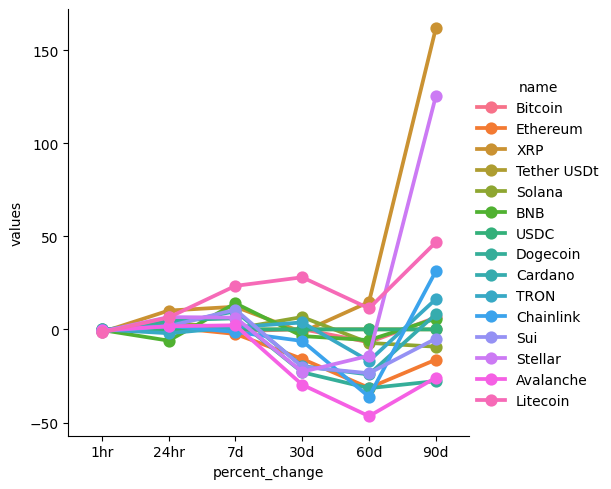

In [59]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [68]:
df9 = df[['name', 'quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,96753.57058,2025-02-14 20:12:52.293062


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

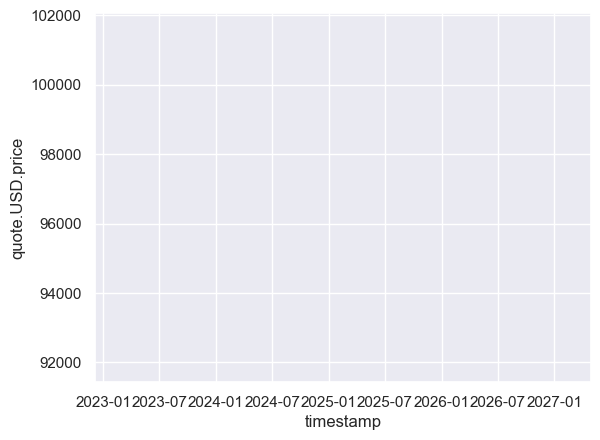

In [70]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp',y='quote.USD.price', data=df9)